In [17]:
# Load libraries 
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
from ast import literal_eval
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [18]:
# Set pandas progress bar
tqdm.pandas()

In [4]:
# Check directory
os.listdir("dataset")

['clean_tweet.xlsx', 'tweet.csv']

In [5]:
# Read dataset
data = pd.read_excel("dataset/clean_tweet.xlsx")

In [6]:
# Overview dataset
data.head()

,sentimen,tweet,clean_tweet,tweet_tokenize
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata prabowo Indonesia tidak dihargai bangsa a...,"['Kata', 'prabowo', 'Indonesia', 'tidak', 'dih..."
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",Batuan Langka Tasbih Jokowi Hadiah dari Habib ...,"['Batuan', 'Langka', 'Tasbih', 'Jokowi', 'Hadi..."
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",Di era Jokowi ekonomi Indonesia semakin baik I...,"['Di', 'era', 'Jokowi', 'ekonomi', 'Indonesia'..."
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",Bagi Sumatera Selatan Asian Games berdampak pd...,"['Bagi', 'Sumatera', 'Selatan', 'Asian', 'Game..."
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,"['Negara', 'kita', 'ngutang', 'buat', 'bngun',..."


In [8]:
# Parsing tokenize value in tweet_tokenize column
data['tweet_tokenize'] = data['tweet_tokenize'].apply(literal_eval)

In [15]:
# Apply stemming on tokenized data using sastrawi

## Define stemming object
stemmer = StemmerFactory()
stemmer = stemmer.create_stemmer()

In [19]:
## Apply on column tweet_tokenize
data['tweet_stemming'] = data['tweet_tokenize'].progress_apply(lambda x: " ".join(list(map(stemmer.stem, x))))

100%|██████████████████████████████████████████████████████████████████████████████| 1815/1815 [07:00<00:00,  4.31it/s]


In [20]:
# Overview dataset
data.head()

,sentimen,tweet,clean_tweet,tweet_tokenize,tweet_stemming
0,negatif,Kata @prabowo Indonesia tidak dihargai bangsa ...,Kata prabowo Indonesia tidak dihargai bangsa a...,"[Kata, prabowo, Indonesia, tidak, dihargai, ba...",kata prabowo indonesia tidak harga bangsa asin...
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib...",Batuan Langka Tasbih Jokowi Hadiah dari Habib ...,"[Batuan, Langka, Tasbih, Jokowi, Hadiah, dari,...",batu langka tasbih jokowi hadiah dari habib lu...
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik....",Di era Jokowi ekonomi Indonesia semakin baik I...,"[Di, era, Jokowi, ekonomi, Indonesia, semakin,...",di era jokowi ekonomi indonesia makin baik ind...
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak p...",Bagi Sumatera Selatan Asian Games berdampak pd...,"[Bagi, Sumatera, Selatan, Asian, Games, berdam...",bagi sumatera selatan asi games dampak pd ekon...
4,negatif,Negara kita ngutang buat bngun infrastruktur y...,Negara kita ngutang buat bngun infrastruktur y...,"[Negara, kita, ngutang, buat, bngun, infrastru...",negara kita ngutang buat bngun infrastruktur y...


# Feature Engineering

In [22]:
# Load libraries 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# Define feature and target data
feature = data['tweet_stemming'].values
target  = data['sentimen'].values

In [24]:
# Transform string to label
encoder = LabelEncoder()
target_encoder = encoder.fit_transform(target)

In [122]:
# Split dataset into training-testing
X_train, X_test, y_train, y_test = train_test_split(feature, target_encoder, test_size = 0.2, random_state = 1)

In [123]:
# Check dimension
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1452,), (363,), (1452,), (363,))

In [124]:
# Transform text data into vector data
embedding = CountVectorizer()
embedding.fit(X_train)

CountVectorizer()

In [125]:
## Apply on train-test
X_train_vec = embedding.transform(X_train)
X_test_vec  = embedding.transform(X_test)

In [126]:
# Check dimension of text vectorized
X_train_vec.shape, X_test_vec.shape

((1452, 5257), (363, 5257))

# Data Modeling

In [54]:
# Load libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
# Set styling
plt.style.use("ggplot")

## Random Forest Baseline

In [142]:
# Define random forest model
model = RandomForestClassifier()

In [143]:
### Training model
model.fit(X_train_vec, y_train)

RandomForestClassifier()

In [144]:
### Evaluate model on train set
pred = model.predict(X_train_vec)
print(classification_report(y_train, pred, target_names = ['negatif', 'netral', 'positif']))

              precision    recall  f1-score   support

     negatif       1.00      1.00      1.00       479
      netral       1.00      1.00      1.00       480
     positif       1.00      1.00      1.00       493

    accuracy                           1.00      1452
   macro avg       1.00      1.00      1.00      1452
weighted avg       1.00      1.00      1.00      1452



In [145]:
### Evaluate model on test set
pred = model.predict(X_test_vec)
print(classification_report(y_test, pred, target_names = ['negatif', 'netral', 'positif']))

              precision    recall  f1-score   support

     negatif       0.58      0.74      0.65       117
      netral       0.61      0.61      0.61       127
     positif       0.60      0.43      0.50       119

    accuracy                           0.59       363
   macro avg       0.59      0.59      0.59       363
weighted avg       0.59      0.59      0.59       363



In [146]:
## Overview parameters baseline
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## Random Forest Parameter Tuning

In [147]:
## Define parameter used for tuning
params = {
    "n_estimators" : [100, 300, 500], 
    "max_depth"    : [5, 10, 15], 
    "max_features" : ['auto', 'sqrt'], 
    "n_jobs"       : [-1]
}

In [148]:
## Define object
grid_search = GridSearchCV(
    estimator = model, param_grid = params, 
    cv = 5, verbose = 1
)
grid_search.fit(X_train_vec, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


C:\Users\alif\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\alif\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\alif\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

C:\Users\alif\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\alif\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\alif\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 300, 500], 'n_jobs': [-1]},
             verbose=1)

In [149]:
## Get parameter tuning metrics and define the best parameters 
metrics_tuning_forest = pd.DataFrame(grid_search.cv_results_)
metrics_tuning_forest = metrics_tuning_forest.sort_values('rank_test_score')
metrics_tuning_forest.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,param_n_jobs,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.966740,0.030368,0.083499,0.007130,15,auto,500,-1,"{'max_depth': 15, 'max_features': 'auto', 'n_e...",0.625430,0.580756,0.637931,0.579310,0.579310,0.600547,0.025731,1
17,0.916739,0.012907,0.090339,0.007867,15,sqrt,500,-1,"{'max_depth': 15, 'max_features': 'sqrt', 'n_e...",0.625430,0.567010,0.651724,0.579310,0.572414,0.599178,0.033455,2
2,0.494211,0.037331,0.098179,0.016691,5,auto,500,-1,"{'max_depth': 5, 'max_features': 'auto', 'n_es...",0.608247,0.577320,0.651724,0.575862,0.579310,0.598493,0.029179,3
15,0.231453,0.009735,0.021127,0.001164,15,sqrt,100,-1,"{'max_depth': 15, 'max_features': 'sqrt', 'n_e...",0.611684,0.587629,0.631034,0.586207,0.572414,0.597794,0.020879,4
10,0.411688,0.010808,0.063594,0.006920,10,sqrt,300,-1,"{'max_depth': 10, 'max_features': 'sqrt', 'n_e...",0.625430,0.567010,0.644828,0.565517,0.582759,0.597109,0.032215,5


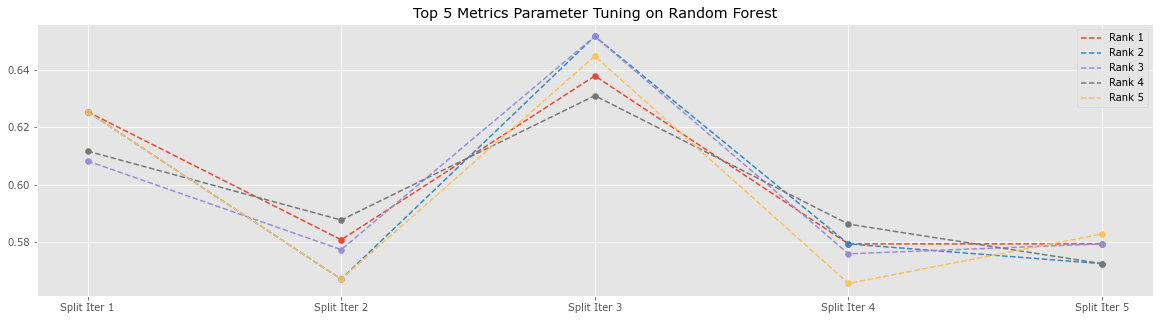

In [150]:
### Visualize metrics and params used
plt.figure(figsize = (20, 5))
for idx in range(5):
    plt.plot(list(range(0, 5)), metrics_tuning_forest.iloc[idx, 9:14], label = f"Rank {idx + 1}", linestyle = "--")
    plt.scatter(list(range(0, 5)), metrics_tuning_forest.iloc[idx, 9:14])
plt.legend()
plt.title("Top 5 Metrics Parameter Tuning on Random Forest")
plt.xticks(list(range(5)), list(map(lambda x: f"Split Iter {x + 1}", range(5))))
plt.show()

In [151]:
### Get Best Parameters
grid_search.best_params_

{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 500, 'n_jobs': -1}

In [157]:
# Define random forest model
model = RandomForestClassifier(max_depth = 15, max_features = "auto", n_estimators = 500, n_jobs = -1)

In [158]:
### Training model
model.fit(X_train_vec, y_train)

C:\Users\alif\anaconda3\envs\test\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=500,
                       n_jobs=-1)

In [159]:
### Evaluate model on train set
pred = model.predict(X_train_vec)
print(classification_report(y_train, pred, target_names = ['negatif', 'netral', 'positif']))

              precision    recall  f1-score   support

     negatif       0.94      0.90      0.92       479
      netral       0.82      0.94      0.88       480
     positif       0.97      0.87      0.92       493

    accuracy                           0.90      1452
   macro avg       0.91      0.90      0.90      1452
weighted avg       0.91      0.90      0.90      1452



In [160]:
### Evaluate model on test set
pred = model.predict(X_test_vec)
print(classification_report(y_test, pred, target_names = ['negatif', 'netral', 'positif']))

              precision    recall  f1-score   support

     negatif       0.59      0.72      0.65       117
      netral       0.62      0.56      0.59       127
     positif       0.60      0.53      0.56       119

    accuracy                           0.60       363
   macro avg       0.60      0.60      0.60       363
weighted avg       0.60      0.60      0.60       363



## LSTM Baseline

In [191]:
# Load libraries
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Embedding, LSTM, Dense, 
    Dropout, GRU, Bidirectional
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import TextVectorization
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [297]:
# Define max length
MAX_LENGTH = 250

In [298]:
## Preprocess text to vector using Tokenizer
embedding_tf = Tokenizer(num_words = 10_000)
embedding_tf.fit_on_texts(X_train)

X_train_embedding = embedding_tf.texts_to_sequences(X_train)
X_test_embedding  = embedding_tf.texts_to_sequences(X_test)

In [299]:
## Preprocess label into one-hot-encoder format
y_train_encoder = to_categorical(y_train)
y_test_encoder = to_categorical(y_test)

In [300]:
## Preprocess vectorized data from stemmed sentences using pad_sequences
X_train_pad = pad_sequences(X_train_embedding, maxlen = MAX_LENGTH)
X_test_pad  = pad_sequences(X_test_embedding, maxlen = MAX_LENGTH)

In [308]:
X_test_pad = X_train_pad[:363]
y_test_encoder = y_train_encoder[:363]

In [315]:
# Create LSTM models with defined parameters
def create_model_lstm(
    n_units_lstm: int = 64, max_words: int = 10_000, 
    max_sequence: int = MAX_LENGTH, dropout_rate: float = 0.2, 
    n_units_dense: int = 32, n_dense_layers: int = 2, 
    output_dim: int = 250
    ):
    
    model = Sequential()
    
    model.add(Input(shape = [max_sequence]))
    model.add(Embedding(input_dim = max_words, output_dim = output_dim, input_length = max_sequence))
    model.add(Bidirectional(LSTM(n_units_lstm, return_sequences = False)))
    
    # model.add(GRU(n_units_lstm, return_sequences = False))
    # model.add(Dense(n_units_dense, activation = "relu"))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation = "softmax"))
    
    return model

In [316]:
# Configure defined model
model = create_model_lstm()

## Compile model with hyperparameters
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [317]:
## Overview architecture
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_26 (Embedding)    (None, 250, 250)          2500000   
                                                                 
 bidirectional_12 (Bidirecti  (None, 128)              161280    
 onal)                                                           
                                                                 
 dropout_22 (Dropout)        (None, 128)               0         
                                                                 
 dense_47 (Dense)            (None, 3)                 387       
                                                                 
Total params: 2,661,667
Trainable params: 2,661,667
Non-trainable params: 0
_________________________________________________________________


In [318]:
# Define custom callbacks
class OwnCallbacks(tf.keras.callbacks.Callback):
    
    def __init__(self, threshold = 0.95):
        super(OwnCallbacks, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        val_acc = logs["val_accuracy"]
        if val_acc >= self.threshold:
            self.model.stop_training = True

In [319]:
# Training model
history = model.fit(
    X_train_pad, y_train_encoder, 
    batch_size = 16, epochs = 100, 
    validation_data = (X_test_pad, y_test_encoder), 
    callbacks = [OwnCallbacks()]
)

Epoch 1/100
91/91 [==============================] - 8s 50ms/step - loss: 1.0371 - accuracy: 0.4607 - val_loss: 0.8531 - val_accuracy: 0.6061
Epoch 2/100
91/91 [==============================] - 3s 36ms/step - loss: 0.6991 - accuracy: 0.7225 - val_loss: 0.3183 - val_accuracy: 0.9036
Epoch 3/100
91/91 [==============================] - 3s 34ms/step - loss: 0.3090 - accuracy: 0.8994 - val_loss: 0.1126 - val_accuracy: 0.9697


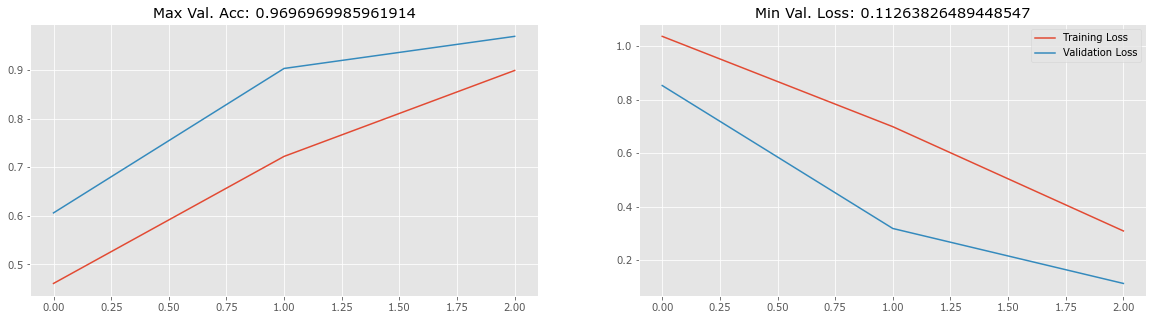

In [321]:
# Visualize plot training and validation
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
epochs = range(len(history.history['loss']))

ax[0].plot(epochs, history.history['accuracy'], label = "Training Accuracy")
ax[0].plot(epochs, history.history['val_accuracy'], label = "Validation Accuracy")
ax[0].set_title(f"Max Val. Acc: {max(history.history['val_accuracy'])}")

ax[1].plot(epochs, history.history['loss'], label = "Training Loss")
ax[1].plot(epochs, history.history['val_loss'], label = "Validation Loss")
ax[1].set_title(f"Min Val. Loss: {min(history.history['val_loss'])}")

plt.legend()
plt.show()

In [327]:
### Evaluate model on train set
pred = model.predict(X_train_pad).argmax(axis = 1)
true = y_train_encoder.argmax(axis = 1)
print(classification_report(true, pred, target_names = ['negatif', 'netral', 'positif']))

46/46 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

     negatif       0.98      0.98      0.98       479
      netral       0.96      0.96      0.96       480
     positif       0.96      0.96      0.96       493

    accuracy                           0.97      1452
   macro avg       0.97      0.97      0.97      1452
weighted avg       0.97      0.97      0.97      1452



In [328]:
### Evaluate model on test set
pred = model.predict(X_test_pad).argmax(axis = 1)
true = y_test_encoder.argmax(axis = 1)
print(classification_report(true, pred, target_names = ['negatif', 'netral', 'positif']))

12/12 [==============================] - 0s 14ms/step
              precision    recall  f1-score   support

     negatif       0.98      0.98      0.98       134
      netral       0.97      0.95      0.96       107
     positif       0.96      0.98      0.97       122

    accuracy                           0.97       363
   macro avg       0.97      0.97      0.97       363
weighted avg       0.97      0.97      0.97       363

